In [26]:
# 初始化环境变量
import sys
nets_path = r'./slim/'
if nets_path not in sys.path:
    sys.path.insert(0,nets_path)
else:
    print("already add slim") 

already add slim


In [27]:
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from nets.nasnet import pnasnet
import numpy as np
from datasets import imagenet

In [28]:
slim = tf.contrib.slim

In [29]:
tf.reset_default_graph() 

In [30]:
# 获得图片输入尺寸
image_size = pnasnet.build_pnasnet_large.default_image_size
# 获得数据集标签
labels = imagenet.create_readable_names_for_imagenet_labels()
# 显示输出标签
print(len(labels))
print('-'*80)
print(labels) 

1001
--------------------------------------------------------------------------------
{0: 'background', 1: 'tench, Tinca tinca', 2: 'goldfish, Carassius auratus', 3: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 4: 'tiger shark, Galeocerdo cuvieri', 5: 'hammerhead, hammerhead shark', 6: 'electric ray, crampfish, numbfish, torpedo', 7: 'stingray', 8: 'cock', 9: 'hen', 10: 'ostrich, Struthio camelus', 11: 'brambling, Fringilla montifringilla', 12: 'goldfinch, Carduelis carduelis', 13: 'house finch, linnet, Carpodacus mexicanus', 14: 'junco, snowbird', 15: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 16: 'robin, American robin, Turdus migratorius', 17: 'bulbul', 18: 'jay', 19: 'magpie', 20: 'chickadee', 21: 'water ouzel, dipper', 22: 'kite', 23: 'bald eagle, American eagle, Haliaeetus leucocephalus', 24: 'vulture', 25: 'great grey owl, great gray owl, Strix nebulosa', 26: 'European fire salamander, Salamandra salamandra', 27: 'com

In [31]:
def getone(onestr):
    return onestr.replace(',',' ')

with open('中文标签.csv','r+',encoding='gbk') as f:
    labels = list(map(getone,list(f)))
    print(len(labels),type(labels),labels[:5]) 

1001 <class 'list'> ['背景known   \n', '丁鲷     \n', '金鱼     \n', '大白鲨     \n', '虎鲨     \n']


In [32]:
sample_images = ['hy.jpg','ps.jpg','72.jpg','filename3.jpg']

input_imgs = tf.placeholder(tf.float32,[None,image_size,image_size,3]) 

x1 = 2 * (input_imgs / 255.0) - 1.0 

arg_scope = pnasnet.pnasnet_large_arg_scope()

with slim.arg_scope(arg_scope):
    logits,end_points = pnasnet.build_pnasnet_large(x1,num_classes=1001,is_training=False)
    prob = end_points['Predictions']
    y = tf.argmax(prob,axis=1) 

INFO:tensorflow:Restoring parameters from ./pnasnet-5_large_2017_12_13/model.ckpt
[621 342 533 880] (4,)


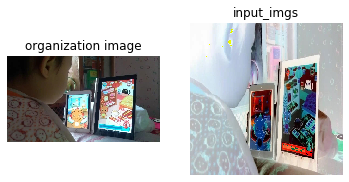

621 笔记本电脑     



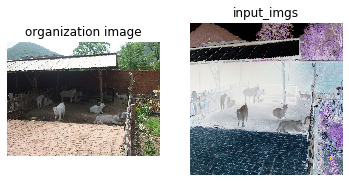

342 猪     



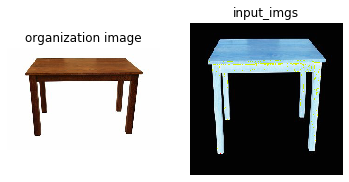

533 餐桌板     



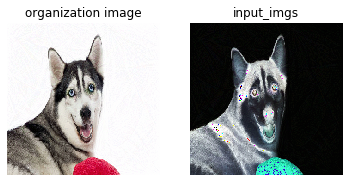

880 伞     



In [33]:
# 定义预训练模型
checkpoint_file = r'./pnasnet-5_large_2017_12_13/model.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess,checkpoint_file)
    
    def preimg(img):
        ch = 3 
        if img.mode == 'RGBA':
            ch = 4 
        
        imgnp = np.asarray(img.resize((image_size,image_size)),
                          dtype=np.float32).reshape(image_size,image_size,ch)
        return imgnp[:,:,:3]
    
    batchImg = [preimg(Image.open(imgfilename)) for imgfilename in sample_images]
    orgImg = [Image.open(imgfilename) for imgfilename in sample_images]
    
    yv,img_norm = sess.run([y,x1],feed_dict={input_imgs:batchImg})
    print(yv,np.shape(yv))
    
    
    def showresult(yy,img_norm,img_org):
        plt.figure()
        p1 = plt.subplot(121)
        p2 = plt.subplot(122)
        p1.imshow(img_org)
        p1.axis('off')
        p1.set_title("organization image")
        
        p2.imshow((img_norm * 255).astype(np.uint8))
        p2.axis("off")
        p2.set_title("input_imgs")
        
        plt.show()
        
        print(yy,labels[yy])
        
    for yy,img1,img2 in zip(yv,batchImg,orgImg):
        showresult(yy,img1,img2) 